In [1]:
import tensorflow as tf
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import keras
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import numpy as np
import pandas as pd
from glob import glob
import cv2
from keras.preprocessing.image import load_img,img_to_array
from keras import layers
import tensorflow_addons as tfa
from tensorflow.keras.applications import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.utils import *
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras import regularizers

In [2]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices())

2.7.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [13]:
class_list=[]
image_list=[]
file = r'./inbreast/INbreast.xls'
df = pd.read_excel(file,nrows=410)
for path in glob('./inbreast/All-PNGs/*.png'):
    name=int(path.split('/')[3].split('_')[0])
    img = cv2.imread(path)
    img=cv2.resize(img,(1200,1200))
    class_list.append(df[df['File Name'] == name]['Bi-Rads'].iloc[0])
    image_list.append(img)

In [14]:
print(class_list)

[2, '4a', 2, '4c', 2, 1, 2, 2, 1, 3, 2, 1, 2, '4c', 2, 1, 2, 1, 2, 2, 2, 2, 2, 5, 2, '4c', 1, 2, 2, 1, 3, 1, 2, 3, 2, 2, 2, 2, 2, '4b', 1, 3, 2, 3, 2, 2, 2, 3, 5, 1, 2, 3, 2, '4c', 1, 2, '4c', 2, 2, 2, 2, 3, 2, 2, '4b', 2, 2, 2, 2, '4a', 2, 5, 5, 5, 2, 5, 1, 2, '4a', 1, '4c', 2, 2, 1, 2, '4c', 1, 2, 2, 2, '4b', 2, 5, 2, 2, 1, 2, 2, 1, 5, 1, 2, 2, 2, 2, 2, 2, '4a', 2, 5, 2, 1, 2, 1, 3, 2, 1, 5, 2, 3, '4a', 2, 1, 2, 2, 1, 1, 2, '4a', 5, 2, 2, 5, 2, 1, '4a', 2, '4c', 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 5, 1, 2, 5, 1, 3, 2, 2, 5, 1, 2, 2, 6, 3, 2, 2, 2, 1, 1, 2, 2, 2, 2, 6, 2, 1, '4c', 1, 2, 2, 2, 1, 5, 6, 2, 2, 2, 5, 2, 2, 1, 5, 2, 2, 2, 1, 5, 5, '4b', 5, '4c', 2, 1, 5, 5, '4a', 3, 2, 3, 2, '4c', 2, 2, 5, 2, 2, 1, 2, 1, 1, 2, 5, 2, 2, 5, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 5, '4c', 1, 2, 5, 3, 2, 2, 2, 2, 2, 5, 2, 2, 1, 1, 1, 5, 2, 3, 2, 1, 2, 2, 1, 1, 2, 2, 2, '4c', 2, 2, 2, 2, 5, 2, 2, 2, 2, 1, 1, 6, 6, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, '4c', 2, 

In [15]:
labels = set(class_list)
print(labels)
label2class = {}
new_class_list =[]
c = 0
for l in labels:
    label2class[l] = c
    c+=1
print(label2class)
for l in class_list:
    new_class_list.append(label2class[l])
X=np.array(image_list)
Y=np.array(new_class_list)
print(X.shape)
print(label2class)

{1, 2, 3, 5, 6, '4b', '4a', '4c'}
{1: 0, 2: 1, 3: 2, 5: 3, 6: 4, '4b': 5, '4a': 6, '4c': 7}
(410, 1200, 1200, 3)
{1: 0, 2: 1, 3: 2, 5: 3, 6: 4, '4b': 5, '4a': 6, '4c': 7}


In [7]:
print(new_class_list)

[1, 6, 1, 7, 1, 0, 1, 1, 0, 2, 1, 0, 1, 7, 1, 0, 1, 0, 1, 1, 1, 1, 1, 3, 1, 7, 0, 1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 1, 1, 5, 0, 2, 1, 2, 1, 1, 1, 2, 3, 0, 1, 2, 1, 7, 0, 1, 7, 1, 1, 1, 1, 2, 1, 1, 5, 1, 1, 1, 1, 6, 1, 3, 3, 3, 1, 3, 0, 1, 6, 0, 7, 1, 1, 0, 1, 7, 0, 1, 1, 1, 5, 1, 3, 1, 1, 0, 1, 1, 0, 3, 0, 1, 1, 1, 1, 1, 1, 6, 1, 3, 1, 0, 1, 0, 2, 1, 0, 3, 1, 2, 6, 1, 0, 1, 1, 0, 0, 1, 6, 3, 1, 1, 3, 1, 0, 6, 1, 7, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 3, 0, 2, 1, 1, 3, 0, 1, 1, 4, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 4, 1, 0, 7, 0, 1, 1, 1, 0, 3, 4, 1, 1, 1, 3, 1, 1, 0, 3, 1, 1, 1, 0, 3, 3, 5, 3, 7, 1, 0, 3, 3, 6, 2, 1, 2, 1, 7, 1, 1, 3, 1, 1, 0, 1, 0, 0, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 3, 7, 0, 1, 3, 2, 1, 1, 1, 1, 1, 3, 1, 1, 0, 0, 0, 3, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 7, 1, 1, 1, 1, 3, 1, 1, 1, 1, 0, 0, 4, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 7, 1, 1, 1, 0, 5, 1, 4, 4, 1, 3, 7, 1, 0, 7, 0, 1, 1, 3, 6, 5, 0, 0, 1, 1, 6, 7, 2, 

In [16]:
new_class_list_1=[False if i<3 else True for i in new_class_list]
print(new_class_list_1)
Y=np.array(new_class_list_1)

[False, True, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, True, False, True, True, True, False, True, False, False, True, False, True, False, False, False, False, True, False, False, False, False, True, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, True, True, False, False, True, False, False, True, False, True, False, False, False, False, False, False, False, True, False, F

In [17]:
x_train, x_test1, y_train, y_test1 = train_test_split(X, Y, test_size=0.3, random_state=42,shuffle=True)
x_val, x_test, y_val, y_test = train_test_split(x_test1, y_test1, test_size=0.33, random_state=42,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
x_train_normalize = x_train.astype('float32') / 255.0
x_test_normalize = x_test.astype('float32') / 255.0
x_val_normalize = x_val.astype('float32') / 255.0

(287, 1200, 1200, 3)
(41, 1200, 1200, 3)
(82, 1200, 1200, 3)


In [18]:
datagen = ImageDataGenerator(zca_whitening=False,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2
                             ,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')


In [ ]:
base_model = VGG19(input_shape=(1200,1200,3), weights='imagenet', include_top=False)
model=Sequential()
model.add(base_model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(256,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,validation_split=0.2,shuffle=True, epochs=10,validation_data=(x_val_normalize, y_val))
loss_value , accuracy = model.evaluate(x_test, y_test)
print('Test_loss_value = ' +str(loss_value))
print('test_accuracy = ' + str(accuracy))

Epoch 1/10


Epoch 1/10
9/9 [==============================] - 163s 16s/step - loss: 447.9290 - accuracy: 0.6934 - val_loss: 335.3661 - val_accuracy: 0.8049
Epoch 2/10
9/9 [==============================] - 161s 17s/step - loss: 251.4668 - accuracy: 0.7561 - val_loss: 168.6308 - val_accuracy: 0.8049
Epoch 3/10
9/9 [==============================] - 163s 17s/step - loss: 169.3449 - accuracy: 0.7422 - val_loss: 159.2979 - val_accuracy: 0.8049
Epoch 4/10
9/9 [==============================] - 161s 17s/step - loss: 143.6761 - accuracy: 0.7561 - val_loss: 124.1903 - val_accuracy: 0.8049
Epoch 5/10
9/9 [==============================] - 159s 17s/step - loss: 127.3820 - accuracy: 0.7596 - val_loss: 123.9366 - val_accuracy: 0.8049
Epoch 6/10
9/9 [==============================] - 162s 17s/step - loss: 123.0112 - accuracy: 0.7561 - val_loss: 113.1848 - val_accuracy: 0.8049
Epoch 7/10
9/9 [==============================] - 161s 17s/step - loss: 117.9274 - accuracy: 0.7526 - val_loss: 119.1568 - val_accuracy:

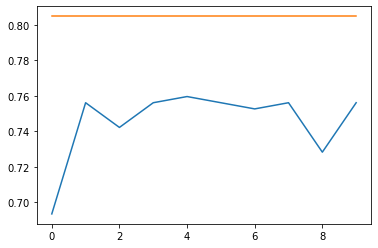

In [19]:
epochs = 10
class_weight = {True: 1.,
                False: 3}
filename='twolayer.csv'
history_logger=tf.keras.callbacks.CSVLogger(filename, separator=",", append=True)
# batch_size = 32
cnn_model=tf.keras.Sequential([
tf.keras.layers.Conv2D(16,(5,5),input_shape=(1200,1200,3),activation='relu'),
tf.keras.layers.MaxPooling2D(2,2), # First Convolution and Pooling Layers
tf.keras.layers.Conv2D(32,(5,5),activation='relu'),
tf.keras.layers.MaxPooling2D(2,2), # Second Convolution and Pooling Layers
tf.keras.layers.Dropout(0.3), # First dropout
# tf.keras.layers.Conv2D(32,(2,2),activation='relu'),
# tf.keras.layers.MaxPooling2D(2,2), # Third Convolution and Pooling Layers
# tf.keras.layers.Dropout(0.3), # Second dropout
])
cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=regularizers.L1(0.01)))
cnn_model.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.L1(0.01)))
opt = Adam(learning_rate=0.001)
cnn_model.compile(optimizer = opt , loss = 'binary_crossentropy' , metrics = ['accuracy'])
# history = cnn_model.fit(x_train, y_train,validation_data=(x_val,y_val),epochs=10)
history = cnn_model.fit(datagen.flow(x_train_normalize, y_train),epochs=epochs,
                        validation_data=(x_val_normalize, y_val),class_weight=class_weight,callbacks=[history_logger],)
loss_value , accuracy = cnn_model.evaluate(x_test,y_test)
print(loss_value,accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
train_y=y_train
val_y=y_val
test_y=y_test
ann_model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history = ann_model.fit(train_features, train_y,validation_data=(val_features,val_y), epochs=100)
loss_value , accuracy = ann_model.evaluate(train_features, train_y)

# print('Train_accuracy is:' + str(accuracy))
# loss_value , accuracy = ann_model.evaluate(val_features, val_y)
# print('Validation_accuracy is := ' + str(accuracy))
# loss_value , accuracy = ann_model.evaluate(test_features, test_y)
# print('test_accuracy is : = ' + str(accuracy))
# print("Performance Report:")
# y_pred1=ann_model.predict(test_features)

# target=["0","1"]
# from sklearn import metrics
# print('Accuracy score is :', np.round(metrics.accuracy_score(test_y, y_pred1),4))
# print('Precision score is :', np.round(metrics.precision_score(test_y, y_pred1, average='weighted'),4))
# print('Recall score is :', np.round(metrics.recall_score(test_y,y_pred1, average='weighted'),4))
# print('F1 Score is :', np.round(metrics.f1_score(test_y, y_pred1, average='weighted'),4))


In [ ]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 100
image_size = 800  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
num_classes = 100
input_shape = (800, 800, 3)
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size,image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [ ]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [ ]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)